<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="800">

# Домашнее задание 5: АБ-тест
</center>

**ФИО:**

## Общая информация

__Дата выдачи:__ 07.04.2025

__Дедлайн:__ 23:59MSK 20.04.2025

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import defaultdict

На семинаре мы попытались разобраться как устроена процедура АБ-тестирования. В этом задании мы попытаемся закрепить полученные знания и более аккуратно структурировать их.

### Кратко повторим теорию

Мы хотим выктить новую функциональность на сайте. Перед раскаткой нам хочется проверить, какой эффект мы оказываем на пользователя. Выделим две выборки: тестовую (treatment) и контрольную (control). Тестовой покажем новый сайт. Контрольной старый. Замерим инетерсующую нас метрику, нааример, время проведенной на сайте, в обеих группах:

$$
\begin{aligned}
&X^c_1, \ldots, X^c_{n_c} \sim iid (\mu_c, \sigma^2_c) \\
&X^t_1, \ldots, X^t_{n_t} \sim iid (\mu_t, \sigma^2_t)
\end{aligned}
$$

У выборок есть какие-то математические ожидания, дисперсии. Выборки собраны независимо друг от друга. Если их математические ожидания одинаковые, будем считать, что новая функциональность никак не повлияла на пользователей. Сформулируем это в виде нашей нулевой гипотезы:

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_c = \mu_t \\
&H_1: \hspace{2mm} \mu_c < \mu_t.
\end{aligned}
$$

Посчитаем по выборке расстояние между математическими ожиданиями $\hat \mu_t - \hat \mu_c$. Оно по ЦПТ имеет нормальное распределение с оценкой дисперсии $\frac{\hat{\sigma}^2_t}{n_t} + \frac{\hat{\sigma}^2_c}{n_c}$. Получается, что

$$
z = \frac{\hat \mu_t - \hat \mu_c}{\sqrt{\frac{\hat{\sigma}^2_t}{n_t} + \frac{\hat{\sigma}^2_c}{n_c}}} \sim N(0,1),
$$

при верности нулевой гипотезы и $n \to \infty$. Если это расстояние оказывается слишком большим, мы отказываемся верить в нулевую гипотезу. Эффект от новой функциональности есть. Будем сравнивать наблюдаемое значение $z$ с $z_{1 - \alpha},$ где уровень значимости $\alpha$ выберем до начала эксперимента.

- Если $z < z_{1 - \alpha},$ нулевая гипотеза не отвергается (похоже, что верна). Расстояние маленькое, разницы нет.
- Если $z > z_{1 - \alpha},$ выбираем альтернативу. У на есть значимый эффект на метрику, от веры в нулевую гипотезу придётся отказаться.

> Ничего не понятно? Тогда вам в лекции. Ниже подборка:  

- [Наша лекция про АБ]( )
- [Неделя про проверку гипотез с курсеры](https://www.youtube.com/watch?v=Zv-5gbJtofk&list=PLCf-cQCe1FRxTgNPwcRSkBjvtE8DEm7rU)


## Задания


__а) [1 балл]__ Реализуйте функцию для проверки гипотезы о равенстве математических ожиданий. Она должна принимать на вход две выборки и выдавать на выход наблюдаемое значение статистики `z_obs` и `p_value` для ситуаций с разными альтернативными гипотезами.

In [37]:
def asy_mean_test(x_control, x_treatment, alternative='larger'):

    n_c = len(x_control)
    n_t = len(x_treatment)

    mean_c = np.mean(x_control)
    mean_t = np.mean(x_treatment)

    var_c = np.var(x_control, ddof=1)
    var_t = np.var(x_treatment, ddof=1)

    se = np.sqrt(var_t / n_t + var_c / n_c)

    z_obs = (mean_t - mean_c) / se

    p_value = 1 - stats.norm.cdf(z_obs)

    #print(f"z_obs = {z_obs}, p_val = {p_value}, mean_c = {mean_c}, mean_t = {mean_t}, {var_c=}, {var_t=}")
    return z_obs, p_value


Если вы написали весь код выше корректно, то строки ниже сработают без проблем.

In [38]:
def gen_sample(n_obs, effect, p_control):
    p_treatment = p_control * (1 + effect)
    x_control = stats.bernoulli(p_control).rvs(n_obs)
    x_treatment = stats.bernoulli(p_treatment).rvs(n_obs)
    return x_control, x_treatment

In [39]:
# Проверка ситуации, когда верна нулевая гипотеза
_, pval = asy_mean_test(*gen_sample(10**5, 0, 0.2))
assert pval > 0.01

In [40]:
# Проверка ситуации, когда верна нулевая гипотеза
_, pval = asy_mean_test(*gen_sample(10**5, 0.1, 0.2))
assert pval < 0.01

Для простоты мы дальше будем работать с односторонней альтернативой и тестом для долей.

$$
\begin{aligned}
&H_0: \hspace{2mm} p_t = p_c \\
&H_1: \hspace{2mm} p_t > p_c
\end{aligned}
$$

__б) [2 балла]__ Предположим, что нулевая гипотеза верна. Как при верности нулевой гипотезы будут распределены `pvalue` и `z_obs`?  

С помощью симуляций сгенерируйте $10^4$ выборок размера $1000$, постройте две гистограммы.

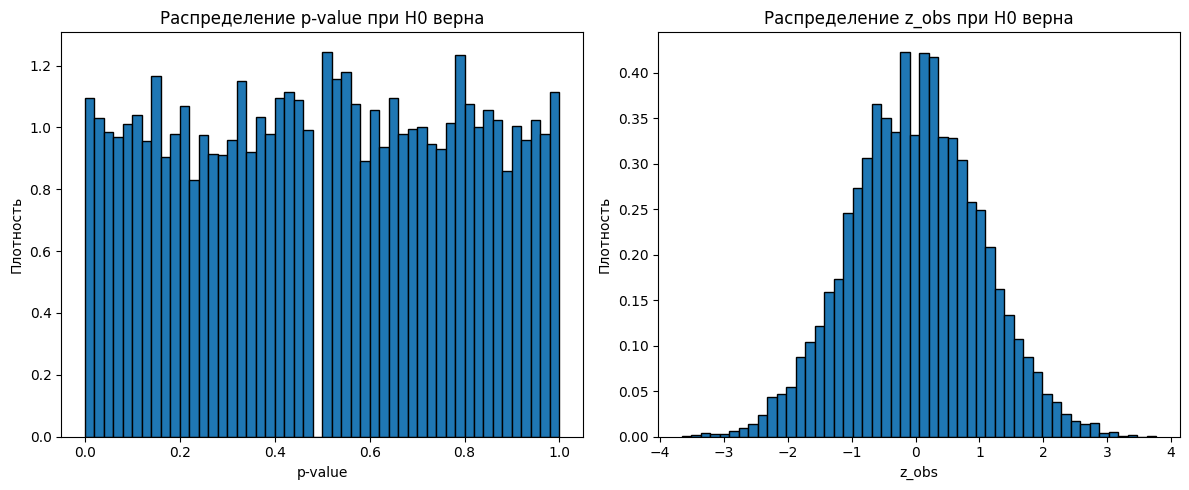

Среднее значение z_obs: -0.003078410169600386


In [41]:
n_sim = 10000
n_obs = 1000
p_control = 0.2

z_vals = []
pvals = []

for _ in range(n_sim):
    x_c, x_t = gen_sample(n_obs, effect=0, p_control=p_control)
    z, p = asy_mean_test(x_c, x_t, alternative='larger')
    z_vals.append(z)
    pvals.append(p)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(pvals, bins=50, density=True, edgecolor='black')
plt.title('Распределение p-value при H0 верна')
plt.xlabel('p-value')
plt.ylabel('Плотность')

plt.subplot(1, 2, 2)
plt.hist(z_vals, bins=50, density=True, edgecolor='black')
plt.title('Распределение z_obs при H0 верна')
plt.xlabel('z_obs')
plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

print("Среднее значение z_obs:", np.mean(z_vals))

Правда ли, что распределение `pvalue` оказалось равномерным на отрезке $[0;1]$? Какое у распределения `z_obs` математическое ожидание? Попытайтесь понятными словами пояснить, почему распределения оказались именно такими.

__Ответ:__ распределение plavue оказалось почти равномерным на 0, 1. у z_obs мат ожидание где-то около нуля.
pvalue отражает вероятность того насколько редко мы получаем эффект. если все равновероятно то и гистограмма это покажет. z score отражает насколько далеко улетают средние одной группы относительно другой.

__в) [1 балл]__ Предположим, что верна альтернативная гипотеза. Доля в тестовой (treatment) выборке оказалась на $20\%$ больше, чем в контрольной. Как при верности нулевой гипотезы будут распределены `pvalue` и `z_obs`?  

С помощью симуляций сгенерируйте $10^4$ выборок размера $1000$, постройте две гистограммы и прокомментируйте получившиеся результаты.

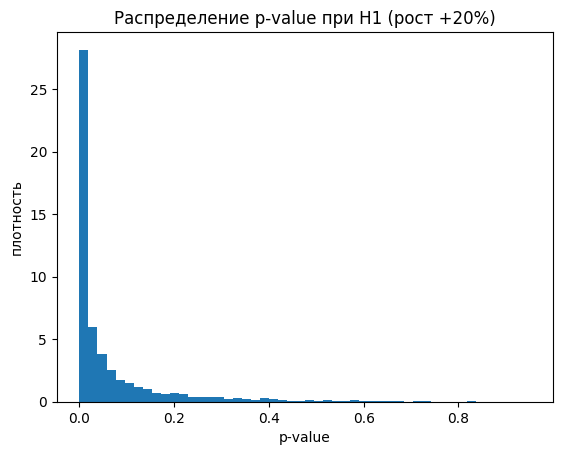

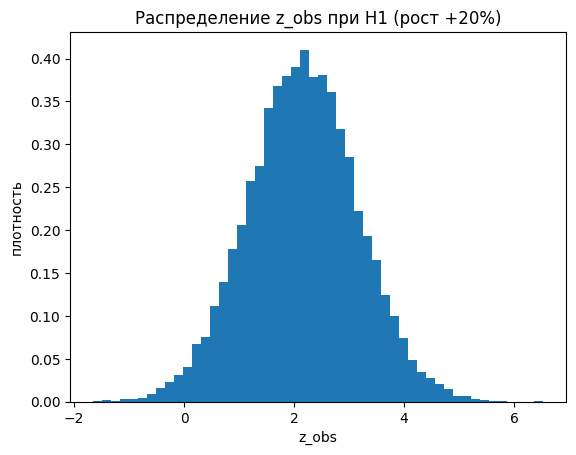

In [42]:
n_sim = 10000
n_obs = 1000
p_control = 0.2
effect = 0.2

pvals = []
z_vals = []

for _ in range(n_sim):
    p_treatment = p_control * (1 + effect)
    x_c = stats.bernoulli(p_control).rvs(n_obs)
    x_t = stats.bernoulli(p_treatment).rvs(n_obs)

    z, p = asy_mean_test(x_c, x_t, alternative='larger')
    z_vals.append(z)
    pvals.append(p)

plt.figure()
plt.hist(pvals, bins=50, density=True)
plt.title('Распределение p‑value при H1 (рост +20%)')
plt.xlabel('p‑value')
plt.ylabel('плотность')
plt.show()

plt.figure()
plt.hist(z_vals, bins=50, density=True)
plt.title('Распределение z_obs при Н1 (рост +20%)')
plt.xlabel('z_obs')
plt.ylabel('плотность')
plt.show()

p_value стянулся к нулю, z score скапливается уже не около нуля, а у 2 и остается нормальным

А как будут выглядеть результаты, если доля в тестовой выборке больше на $40\%$? Проведите симуляции.

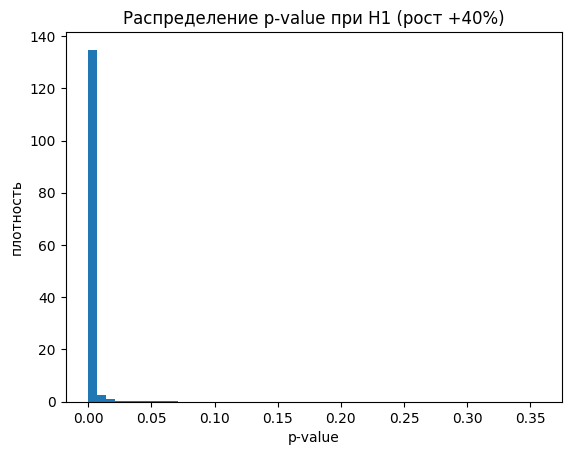

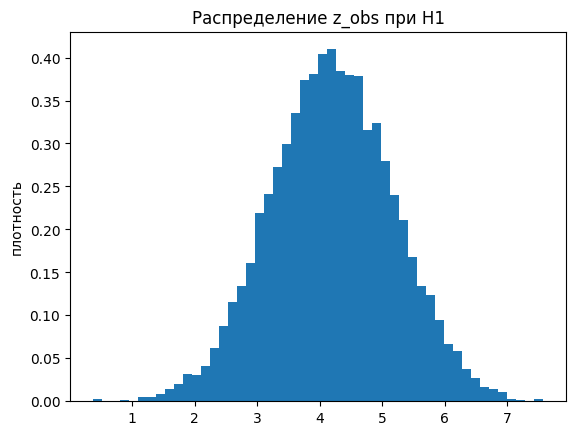

In [44]:
n_sim = 10000
n_obs = 1000
p_control = 0.2
effect = 0.4

pvals = []
z_vals = []

for _ in range(n_sim):
    p_treatment = p_control * (1 + effect)
    x_c = stats.bernoulli(p_control).rvs(n_obs)
    x_t = stats.bernoulli(p_treatment).rvs(n_obs)

    z, p = asy_mean_test(x_c, x_t, alternative='larger')
    z_vals.append(z)
    pvals.append(p)

plt.figure()
plt.hist(pvals, bins=50, density=True)
plt.title('Распределение p‑value при H1 (рост +40%)')
plt.xlabel('p‑value')
plt.ylabel('плотность')
plt.show()

plt.figure()
plt.hist(z_vals, bins=50, density=True)
plt.title('Распределение z_obs при H1')
plt.ylabel('плотность')
plt.show()

Правда ли, что распределение `pvalue` оказалось равномерным на отрезке $[0;1]$? Какое у распределения `z_obs` математическое ожидание? Попытайтесь понятными словами пояснить, почему распределения оказались именно такими.

__Ответ:__ pvalue не равномерно, а уползает на 0. мат ожидание z_obs чуть больше четырех. при увеличении эффекта тест видит разницу и уменьшает pvalue, увеличивает z_obs

__г) [1 балл]__ Обычно, перед началом эксперимента, мы фиксируем ошибку первого рода, вероятность отвергнуть нулевую гипотезу, когда она на самом деле верна,  

$$\alpha = \mathbb{P}(H_A \text{ выбрана} \mid H_0 \text{ верна}).$$

Дальше мы принимаем решение, о том, какую гипотезу выбрать, сравнивая `z_obs` с $z_{1 - \alpha},$ либо `pvalue` с $\alpha$ (напомню что мы делаем симуляции для правосторонней альтернативы, поэтому $\alpha$ не надо делить на два).

Давайте проверим для конкретного $\alpha$, что это правда работает. Выберите любое разумное значение $\alpha$. С помощью симуляций сгенерируйте $10^4$ выборок размера $1000$ при верности нулевой гипотезы. Проверьте эти гипотезы и оцените получившееся значение $\alpha$. Правда ли, что оно оказалось равно заявленному значению?

__P.S.__ в идеале, тут надо воспользоваться уже проделанными выше симуляциями.

In [46]:
alpha = 0.05
n_sim = 10000
n_obs = 1000
p_control = 0.2

rejections = 0
for _ in range(n_sim):
    x_c, x_t = gen_sample(n_obs, effect=0, p_control=p_control)
    _, pval = asy_mean_test(x_c, x_t, alternative='larger')
    if pval < alpha:
        rejections += 1

emp_alpha = rejections / n_sim
print(f"Заданное альфа = {alpha:.2f}, наблюдаемое альфа ≈ {emp_alpha:.3f}")

Заданное альфа = 0.05, наблюдаемое альфа ≈ 0.051


Кроме ошибки первого рода есть ещё и ошибка второго рода, вероятность остаться с нулевой гипотезой, когда верна альтернатива,

$$\beta = \mathbb{P}(H_0 \text{ выбрана} \mid H_A \text{ верна}).$$

Давайте предположим, что доля в тестовой (treatment) выборке оказалась на $20\%$ больше, чем в контрольной. С помощью симуляций того же самого объёма оцените, чему равна $\beta$.

__P.S.__ в идеале, тут надо воспользоваться уже проделанными выше симуляциями.

In [47]:
def estimate_beta(effect):
    failures = 0
    for _ in range(n_sim):
        x_c, x_t = gen_sample(n_obs, effect=effect, p_control=p_control)
        _, pval = asy_mean_test(x_c, x_t, alternative='larger')
        if pval >= alpha:
            failures += 1
    return failures / n_sim

In [48]:
alpha = 0.05
n_sim = 10000
n_obs = 1000
p_control = 0.2

beta_20 = estimate_beta(0.2)

print(f"бета (эффект +20%) ≈ {beta_20:.3f}")

бета (эффект +20%) ≈ 0.300


Теперь доля в тестовой выборке оказалась на $40\%$ больше, чем в контрольной. Чем равна $\beta$ здесь?

In [49]:
alpha = 0.05
n_sim = 10000
n_obs = 1000
p_control = 0.2
beta_40 = estimate_beta(0.4)
print(f"бета (эффект +40%) ≈ {beta_40:.3f}")

бета (эффект +40%) ≈ 0.006


Что с ошибкой второго рода происходит при росте эффекта? Что происходит с ней, если при проверке гипотезы взять более маленькое $\alpha$?

__Ответ:__ при росте эффекта бэта уменьшается, если взять более маленькое альфа бэта вырастет

__д) [1 балл]__ Ошибки $\alpha$ и $\beta$ связаны между собой. Чем выше, при фиксированном размере выборки и эффекта мы делаем одну, тем ниже другая. Давайте попробуем в рамках проделанных выше симуляций нарисовать взаимосвязь между ошибками.

Выше, для оценки $\beta$ вы сравнивали вектор `pval` с зафиксированным значением `alpha`.  Переберите `alpha` по циклу от 0 до 1 с шагом 0.01 и оцените для каждого значения `alpha` значение `beta`.

Нарисуйте получившуюся взаимосвязь на графике для эффекта в 20% и 40%. Какая из кривых идёт ниже?

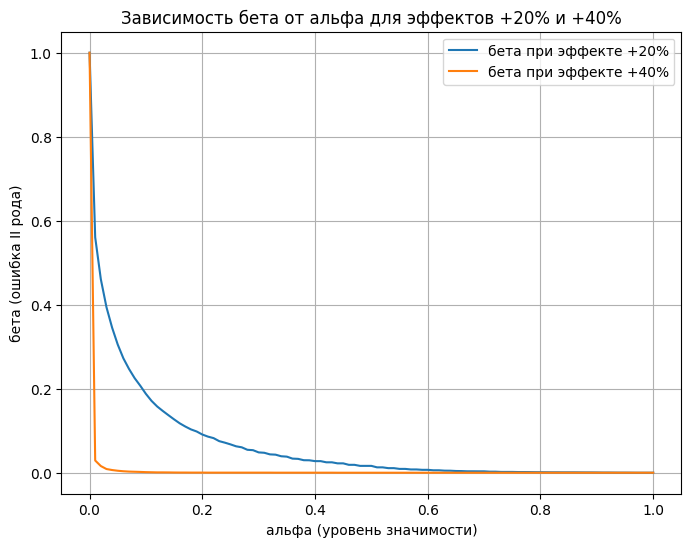

In [50]:
n_sim = 10000
n_obs = 1000
p_control = 0.2
effects = [0.2, 0.4]
alphas = np.arange(0, 1.01, 0.01)

pvals_dict = {}
for eff in effects:
    pvals = np.empty(n_sim)
    for i in range(n_sim):
        x_c, x_t = gen_sample(n_obs, eff, p_control)
        _, pvals[i] = asy_mean_test(x_c, x_t, alternative='larger')
    pvals_dict[eff] = pvals

plt.figure(figsize=(8, 6))
for eff in effects:
    betas = [(pvals_dict[eff] >= alpha).mean() for alpha in alphas]
    plt.plot(alphas, betas, label=f'бета при эффекте +{int(eff*100)}%')

plt.xlabel('альфа (уровень значимости)')
plt.ylabel('бета (ошибка II рода)')
plt.title('Зависимость бета от альфа для эффектов +20% и +40%')
plt.legend()
plt.grid()
plt.show()

Нарисуйте точно такую же кривую для ситуации, когда была верна нулевая гипотеза.

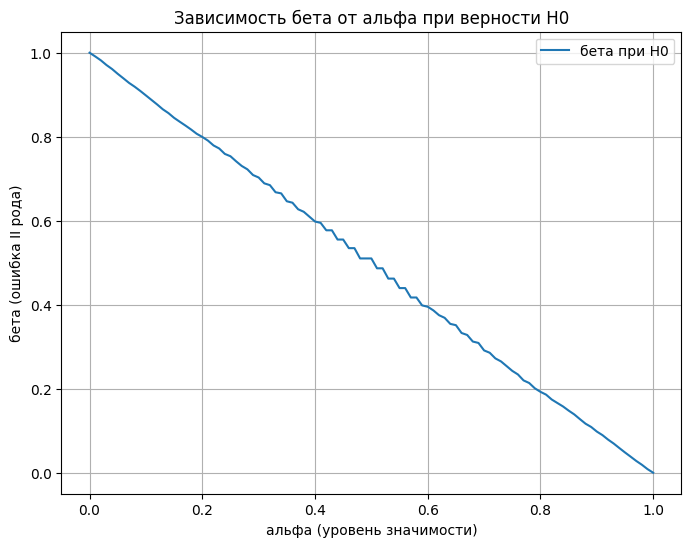

In [52]:
pvals_h0 = np.empty(n_sim)
for i in range(n_sim):
    x_c, x_t = gen_sample(n_obs, effect=0, p_control=p_control)
    _, pvals_h0[i] = asy_mean_test(x_c, x_t, alternative='larger')

betas_h0 = [(pvals_h0 >= alpha).mean() for alpha in alphas]

plt.figure(figsize=(8, 6))
plt.plot(alphas, betas_h0, label='бета при H0')
plt.xlabel('альфа (уровень значимости)')
plt.ylabel('бета (ошибка II рода)')
plt.title('Зависимость бета от альфа при верности H0')
plt.legend()
plt.grid()
plt.show()

Вместо осей $(\alpha, \beta)$ обычно такой график рисуют в осях $(\alpha, 1 - \beta)$. Давайте построим его и проинтерпретируем.

In [53]:
def plot_pvalue_distribution(dict_pvalues):
    xseq = np.linspace(0, 1, 1000)

    for key, pvalues in dict_pvalues.items():
        yseq = [np.mean(pvalues < x) for x in xseq]
        plt.plot(xseq, yseq, label=key)

    plt.plot([0, 1], [0, 1], '--k', alpha=0.8)
    plt.title('Распределение p-value/ROC-кривая', size=16)
    plt.xlabel('альфа', size=12)
    plt.ylabel('1 - бета', size=12)
    plt.legend(fontsize=12)
    plt.grid()

Заполните пропуски в коде ниже, чтобы для нашего АБ-теста отрисовались ROC-кривые.

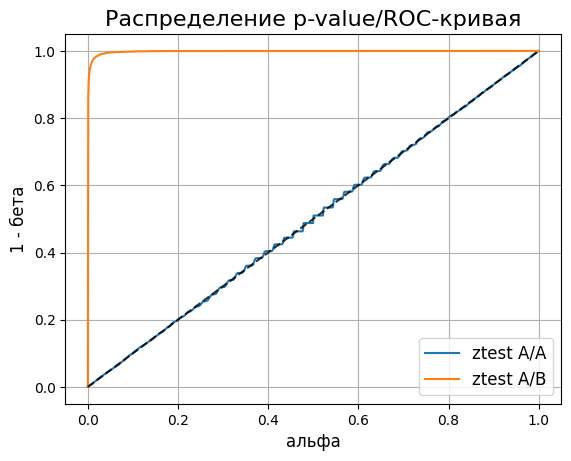

In [54]:
n_sim = 10**4
sample_size = 1000

dict_pvalues = defaultdict(list)
for _ in range(n_sim):

    x_control, x_treatment = gen_sample(sample_size, effect, p_control)
    z_obs_ab, pval_ab = asy_mean_test(x_control, x_treatment, alternative='larger')

    x_control_again, _ = gen_sample(sample_size, 0, p_control)
    z_obs_aa, pval_aa = asy_mean_test(x_control, x_control_again)

    dict_pvalues['ztest A/A'].append(pval_aa)
    dict_pvalues['ztest A/B'].append(pval_ab)

plot_pvalue_distribution(dict_pvalues)

Получившийся график можно проинтерпретировать двумя способами. Мы много-много раз проводим АБ-тест. В начале теста мы зафиксировали какую-то $\alpha$ и дальше проверяем кучу гипотез.

1. Линия `ztest A/A` это функция распределения pvalue при верности нулевой гипотезы. Оно было равномерным, мы двигаем $\alpha$ по оси $OX$ и оцениваем $\mathbb{P}(\text{pvalue} \le \alpha) = F(\alpha)$.  

По аналогии, линия `ztest A/B` это функция распределения pvalue при верности альтернативной гипотезы.

2. Линию `ztest A/B` можно проинтерпретировать как ROC-кривую. Если вы уже знаете про задачу классификации из машинного обучения, то это ровно оно. Полнота это $1 - \beta$, то есть то, сколько верных альтернативных гипотез мы найдём, если будем использовать наш АБ-тест, FPR это $\alpha$, то есть то, сколько верных нулевых гипотез мы заберём с собой в альтернативные. Эту величину мы определяем до старта эксперимента.

> Важно: если вы не поняли интерпретацию из пункта 2, просто забейте. Заботаете МО, поймёте. Интерпретацию из пункта 1 должны понять все. Если вы её не поняли, время напрячься и подумать ещё разок.

__Что для нас важно:__

- Чем выпуклее график, тем лучше мы находим эффект и процедура проверки гипотезы работает корректно;
- Чем больше у нас наблюдений тем выпуклее график;
- Чем сильнее в тестовой выборке подскакивает $p_t$ при изменениях, тем легче нам найти эффект и тем выпуклее график;
- Если $p_t$ подскочило на очень маленькую величину, нам сложнее найти это изменение, и график будет менее выпуклым;
- Чем меньше в выборках дисперсия, тем выпуклее график.

__е) [2 балла]__ При верности альтернативной гипотезы, постройте ROC-кривые из пункта выше для разного числа наблюдений в выборке: 10, 100, 1000, 10000 при любом фиксированном эффекте.

<ipython-input-37-79c9ca7ef7fa>:14: RuntimeWarning: invalid value encountered in scalar divide
  z_obs = (mean_t - mean_c) / se


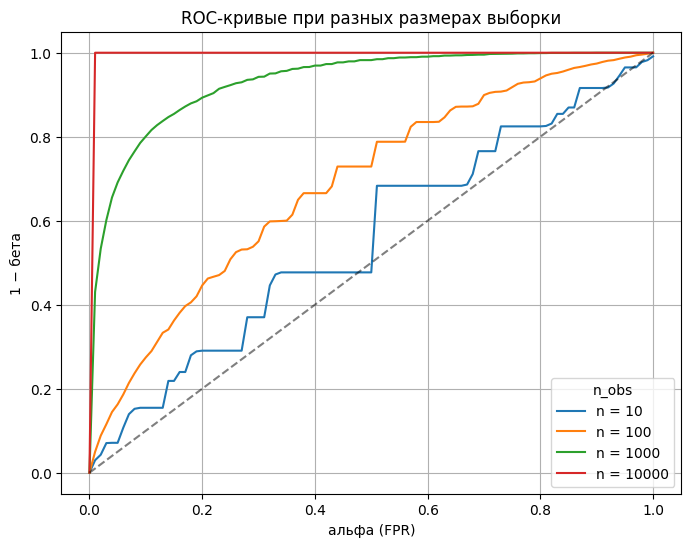

In [55]:
n_sim = 5000
p_control = 0.2
effect = 0.2
sample_sizes = [10, 100, 1000, 10000]
alphas = np.linspace(0, 1, 101)

plt.figure(figsize=(8, 6))

for n_obs in sample_sizes:
    pvals = np.empty(n_sim)
    for i in range(n_sim):
        x_c, x_t = gen_sample(n_obs, effect, p_control)
        _, pvals[i] = asy_mean_test(x_c, x_t, alternative='larger')
    tpr = [(pvals < alpha).mean() for alpha in alphas]
    plt.plot(alphas, tpr, label=f'n = {n_obs}')

plt.plot([0, 1], [0, 1], '--k', alpha=0.5)

plt.xlabel('альфа (FPR)')
plt.ylabel('1 − бета')
plt.title('ROC‑кривые при разных размерах выборки')
plt.legend(title='n_obs')
plt.grid()
plt.show()

__ё) [1 балл]__ Количество наблюдений, ошибка 1 и 2 рода, размер эффекта, который мы ищем и дисперсия в выборках связаны между собой. Для некоторых критериев проверки гипотез можно вывести формулы, которые их связывают.

В данном случае, формула для расчета числа наблюдений _для одной группы_ выглядит вот так:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

В приложении Яндекс.Такси в конце поездки вылезают рандомные опросники. В одном из опросников задаётся вопрос «А вы пристёгивались, когда ехали?»

В России, в день, в Такси происходит 1 миллион заказов. Вопрос про ремни задаётся рандомным 10% пользователей, закончивших поездку. Пользователь не игнорирует опросник и отвечает на него да или нет с вероятностью 5% (цифры взяты из головы и не отражают реальную статистику).

Менеджер Екатерина хочет сделать так, чтобы когда пассажир садится в машину, Алиса просила его пристегнуться. Хочется замерить, какой эффект это даст на пристёгивания. Станут ли люди чаще пристёгиваться. Замерять мы это будем опросником. Сейчас 10% пользователей говорят, что пристегнулись.

Екатерина пришла к вам и между вами состоялся следующий диалог:

- Хочу АБ-тест с разбивкой 50 на 50.
- Какие ошибки 1 и 2 рода хочешь?
- Нулевые.
- Нам надо бесконечно наблюдений, готова столько ждать?
- Нет.
- На сколько мы хотим, чтобы выросла доля ответов да?
- Если подрастёт хотябы на процент, будет круто.
- То есть если меньше процента, такой эффект считаем неудачей и отсутствием изменения?
- Да.
- Давай я нарисую тебе табличку с разными ошибками, а внутри на пересечении напишу сколько дней надо ждать, чтобы найти такой минимальный эффект.
- Давай, по ней и примем решение.

Нарисуйте для Екатерины такую табличку. Не забудьте перевести общее количество наблюдений в дни.

In [59]:
p_control = 0.10
mde = 0.01
p_treatment = p_control + mde

var_c = p_control * (1 - p_control)
var_t = p_treatment * (1 - p_treatment)

daily_orders = 1000000
survey_fraction = 0.10
response_rate = 0.05
daily_per_group = daily_orders * survey_fraction * response_rate / 2

alphas = [0.01, 0.05, 0.10]
betas  = [0.1,  0.2,  0.3,  0.4,  0.5]

days = np.zeros((len(betas), len(alphas)), dtype=int)

for i, b in enumerate(betas):
    z_beta = stats.norm.ppf(1 - b)
    for j, a in enumerate(alphas):
        z_alpha = stats.norm.ppf(1 - a)
        n_per_group = (var_c + var_t) * (z_alpha + z_beta)**2 / mde**2
        days[i, j] = int(np.ceil(n_per_group / daily_per_group))

header = "\t" + "\t".join(f"альфа={a:.2f}" for a in alphas)
print(header)
for i, b in enumerate(betas):
    row = "\t".join(str(days[i, j]) for j in range(len(alphas)))
    print(f"бета={b:.1f}\t{row}")

	альфа=0.01	альфа=0.05	альфа=0.10
бета=0.1	10	7	5
бета=0.2	8	5	4
бета=0.3	7	4	3
бета=0.4	6	3	2
бета=0.5	5	3	2


__ж) [1 балл]__ Попробуем сломать наш АБ-тест. Когда мы используем z-тест, мы размышляем в терминах центральной предельной теоремы. Тест будет работать, если выполнены предпосылки ЦПТ:

- Наблюдения независимо одинаково распределены
- В данных нет выборосов, дисперсия конечная
- Данных много

Давайте сломаем одно из условий и попробуем собрать выборку из [распределения Парето](https://ru.wikipedia.org/wiki/Распределение_Парето).

In [57]:
def gen_sample(n_obs, effect, b=0.5):
    x_control = stats.pareto(b=b).rvs(n_obs)
    x_treatment = stats.pareto(b=b).rvs(n_obs)
    x_treatment = (1 + effect) * x_treatment
    return x_control, x_treatment

Отрисуйте ROC-кривые для $b=3$, $b=1$, $b=0.5$

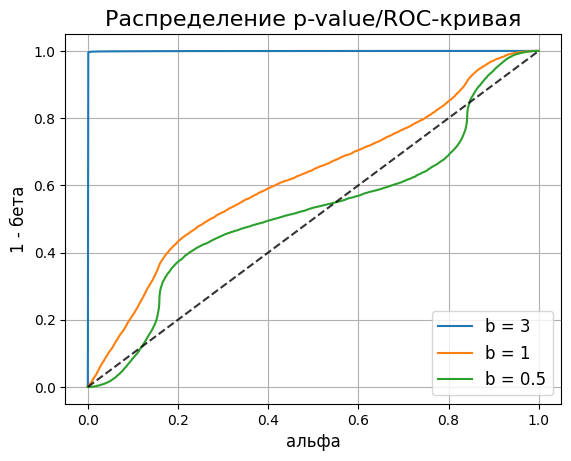

In [58]:
n_sim = 10**4
sample_size = 1000
effect = 0.2
b_values = [3, 1, 0.5]

dict_pvalues = {}
for b in b_values:
    pvals = []
    for _ in range(n_sim):
        x_c, x_t = gen_sample(sample_size, effect, b=b)
        _, p = asy_mean_test(x_c, x_t, alternative='larger')
        pvals.append(p)
    dict_pvalues[f'b = {b}'] = pvals

plot_pvalue_distribution(dict_pvalues)

Возьмите при каждом $b$ одну выборку, нарисуйте для неё гистограмму и посмотрите как обстоят дела с выбросами.

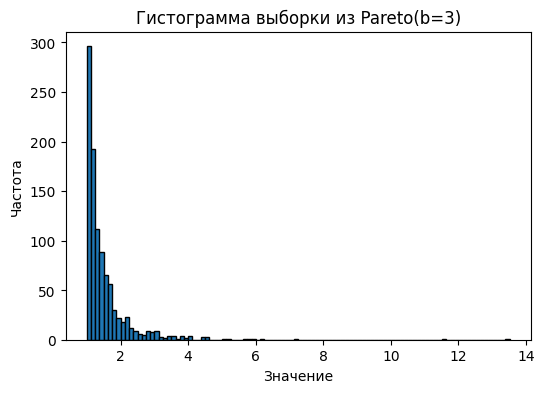

b=3: мин=1.00, медиана=1.26, 99%-квантиль=4.55, макс=13.51


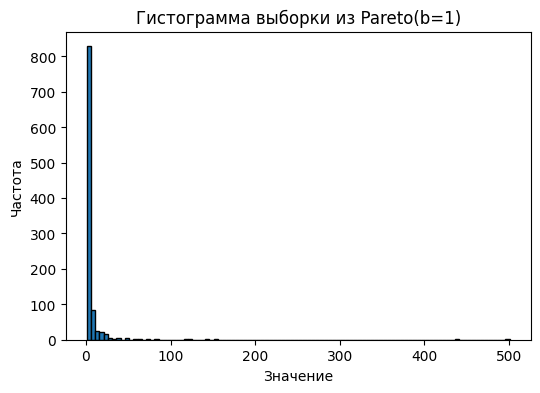

b=1: мин=1.00, медиана=1.98, 99%-квантиль=57.70, макс=500.45


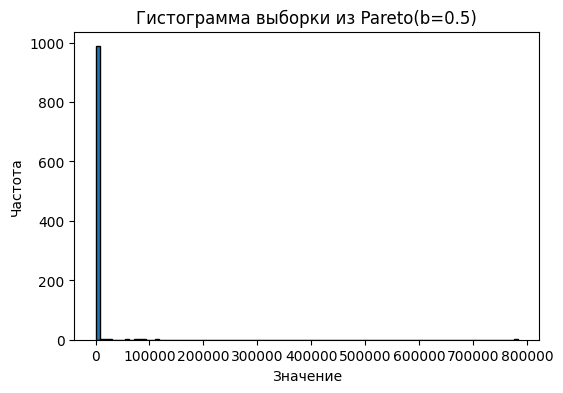

b=0.5: мин=1.00, медиана=4.20, 99%-квантиль=9527.79, макс=783401.36


In [31]:
n_obs = 1000
b_values = [3, 1, 0.5]
effect = 0.0

for b in b_values:
    x_control, _ = gen_sample(n_obs, effect, b=b)

    plt.figure(figsize=(6, 4))
    plt.hist(x_control, bins=100, edgecolor='black')
    plt.title(f'Гистограмма выборки из Pareto(b={b})')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.show()

    print(
        f'b={b}: '
        f'мин={x_control.min():.2f}, '
        f'медиана={np.median(x_control):.2f}, '
        f'99%-квантиль={np.percentile(x_control, 99):.2f}, '
        f'макс={x_control.max():.2f}'
    )

У распределения Парето не всегда существует дисперсия. Это ломает предпосылки ЦПТ и АБ-тест разваливается.

Возникает вполне резонный вопрос: а что делать в таких ситуациях? Есть несколько дорог.

- Во-первых, можно отвязаться от математического ожидания и поработать с медианой. Для неё тоже можно вывести асимптотическое распределение с помощью дельта-метода.
- Во-вторых, можно попробовать другие техники проверки гипотез. Например, бутстрап и непараметрические критерии.

Об этом мы и будем говорить на следующих парах.